##Medicare Part D Spending - Exploratory Data Analysis
##Stony Brook University
#### HHA 506 Research Methods for Informatics Professionals
#### Submitted by: Christopher Videtto
#### Faculty: Prof. Hants Williams Ph.D

![](https://drive.google.com/file/d/13KMTbtSANJmDAiO5n9OO95RXxH_pnvu_/view?usp=sharing)

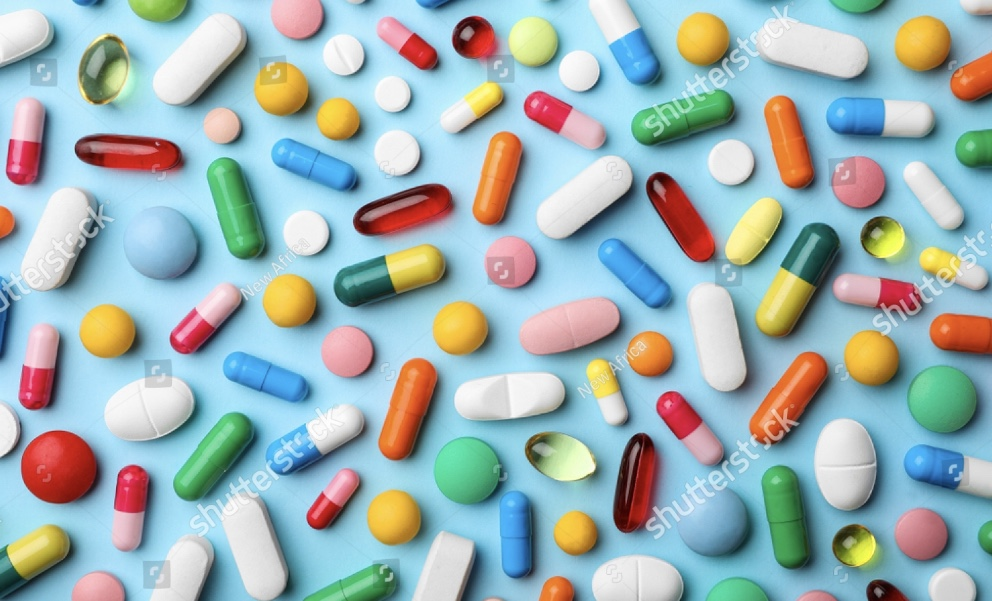

#### Lets begin this EDA by setting up the notebook environment

In [ ]:
import io
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
### Now we need to import the data set we want to use from Medicare
from google.colab import files
uploaded = files.upload()

Saving Medicare_PartD_Spending2018.csv to Medicare_PartD_Spending2018.csv


## Exploring the Data

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Medicare_PartD_Spending2018.csv']))
df.sample(5)

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Change in Average Spending Per Dosage Unit (2017-2018)
3103,Triumeq,Abacavir/Dolutegravir/Lamivudi,1,"$764,629,132.10","8,067,379","258,493","29,120",$94.78,"$2,958.03","$26,257.87",0,8.07%
2516,Promethazine Vc-Codeine,Promethazine/Phenyleph/Codeine,1,"$3,902.89","13,449",88,77,$0.29,$44.35,$50.69,0,-6.89%
285,Azithromycin*,Azithromycin,20,"$64,924,393.93","57,234,807","8,021,706","5,842,975",$1.16,$8.09,$11.11,0,2.09%
3214,Vanishpoint,"Syringe-Needle,Insulin,0.5 Ml",1,"$6,966.27","9,390",112,18,$0.74,$62.20,$387.02,0,5.41%
264,Avelox IV,Moxifloxacin-Sod.Chloride(Iso),1,"$8,968.80","39,457",43,32,$0.23,$208.58,$280.28,0,4.55%


In [ ]:
df.dtypes

Brand Name                                                object
Generic Name                                              object
Number of Manufacturers                                    int64
Total Spending                                            object
Total Dosage Units                                        object
Total Claims                                              object
Total \nBeneficiaries                                     object
Average Spending Per Dosage Unit (Weighted)               object
Average \nSpending Per Claim                              object
Average \nSpending Per Beneficiary                        object
Outlier \nFlag                                            object
Change in Average Spending Per Dosage Unit (2017-2018)    object
dtype: object

## Cleaning the Data
#### It looks like some of the feature's names need to be fixed and
#### the dollar amounts for each drug are an object not a number, lets change that!

In [ ]:
### Clean up Total Spending name and convert to float
df['Total Spending'] = df['Total Spending'].str.replace('$', '')
df['Total Spending'] = df['Total Spending'].str.replace(',', '').astype(float)

In [ ]:
### Clean up Average Spending per unit and convert to float
df['Average Spending Per Dosage Unit (Weighted)'] = df['Average Spending Per Dosage Unit (Weighted)'].str.replace('$', '')
df['Average Spending Per Dosage Unit (Weighted)'] = df['Average Spending Per Dosage Unit (Weighted)'].str.replace(',', '').astype(float)

In [ ]:
### Force pandas to stop using scientific notation, and only use 2 decimal places for currency
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
### Clean up column names using a different method
df.rename(columns = {'Total \nBeneficiaries' : 'Total Beneficiaries'}, inplace = True)
df.rename(columns = {'Average \nSpending Per Claim' : 'Average Spending Per Claim'}, inplace = True)
df.rename(columns = {'Average \nSpending Per Beneficiary' : 'Average Spending Per Beneficiary'}, inplace = True)
df.rename(columns = {'Average Spending Per Dosage Unit (Weighted)' : 'Average Price Per Dose'}, inplace = True)
df.rename(columns = {'Outlier \nFlag' : 'Outlier Flag'}, inplace = True)
df.rename(columns = {'Change in Average Spending Per Dosage Unit (2017-2018)' : 'Change in Spending Per Dose'}, inplace = True)

In [ ]:
### Confirm that our changes to the features worked
df.dtypes

Brand Name                           object
Generic Name                         object
Number of Manufacturers               int64
Total Spending                      float64
Total Dosage Units                   object
Total Claims                         object
Total Beneficiaries                  object
Average Price Per Dose              float64
Average Spending Per Claim           object
Average Spending Per Beneficiary     object
Outlier Flag                         object
Change in Spending Per Dose          object
dtype: object

In [ ]:
###Lets create a new data frame with the specific variables we are interested in...
df2 = df[['Brand Name','Number of Manufacturers','Total Spending','Average Price Per Dose']]
df2

,Brand Name,Number of Manufacturers,Total Spending,Average Price Per Dose
0,1st Tier Unifine Pentips,1,167193.78,0.22
1,1st Tier Unifine Pentips Plus,1,369416.83,0.20
2,Abacavir,9,14479715.39,4.04
3,Abacavir-Lamivudine,5,24587440.48,11.06
4,Abacavir-Lamivudine-Zidovudine,1,6955321.12,21.03
...,...,...,...,...
3469,Zyprexa Zydis,1,4465981.99,29.24
3470,Zyprexa*,1,20421145.92,25.37
3471,Zytiga,2,1475649550.90,108.75
3472,Zyvox,1,860973.30,203.87


In [ ]:
### Beautiful!! 
### Lets check for null values in Total Spending and Average Price Per Dose because we are using this for a plot later

df_check = pd.DataFrame(df['Total Spending'])
df_check.isnull().values.sum()
df_check = pd.DataFrame(df['Average Price Per Dose'])
df_check.isnull().values.sum()

0

In [ ]:
### Excellent, there are no null values

## Analyzing the Data

#### What are the 10 most popular drugs that Medicare spends money on?

In [ ]:
df_desc = df2.sort_values('Total Spending', ascending=False)
df_desc.head(10)

,Brand Name,Number of Manufacturers,Total Spending,Average Price Per Dose
992,Eliquis,1,4992184164.40,7.00
2632,Revlimid,1,4065088800.50,697.35
3340,Xarelto,1,3358810708.00,13.97
1532,Januvia,1,3228917720.20,14.24
1784,Lyrica,1,2950257660.50,7.55
61,Advair Diskus,1,2394014929.40,6.71
1379,Humira Pen,1,2388794496.60,2457.83
1635,Lantus Solostar,1,2370490821.50,26.54
1438,Imbruvica,1,1867207012.50,303.62
2882,Symbicort,1,1751221155.50,31.63


#### Interesting...those sound familiar
#### Now, lets investigate the relationship between Number of Manufacturers and Total Spending or Average Spending Per Dosage Unit¶

In [ ]:
### First, do a value count and statistical analysis
df2['Number of Manufacturers'].value_counts()

1     2411
2      300
3      137
5       83
7       74
4       73
6       61
8       46
9       42
11      38
10      37
12      28
13      22
15      20
17      18
14      13
16      11
22       9
21       6
18       6
19       5
25       5
23       5
24       4
20       4
26       3
30       2
32       2
31       2
28       2
33       1
38       1
27       1
29       1
44       1
Name: Number of Manufacturers, dtype: int64

In [ ]:
### Look at central tendency, distribution of responses, and quartile ranges
df2.describe()

,Number of Manufacturers,Total Spending,Average Price Per Dose
count,3474.00,3474.00,3474.00
mean,2.75,48399232.88,236.71
std,4.19,212573809.03,1608.53
min,1.00,112.71,0.00
25%,1.00,95246.18,0.84
50%,1.00,1450777.06,5.51
75%,2.00,17986335.22,26.83
max,44.00,4992184164.40,38586.16


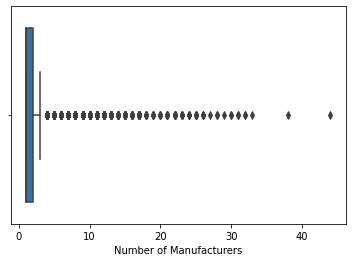

In [ ]:
### Try representing this data as a box plot instead of just numbers
import seaborn as sns
sns.boxplot(x=df2['Number of Manufacturers'])

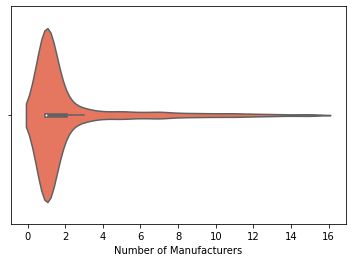

In [ ]:
### Lets exclude some of these outliars with manufacturers  
### that are greater than 3 standard deviations or > 15
df_manufacturers = df2[df2['Number of Manufacturers'] <= 15]
sns.violinplot(x=df_manufacturers['Number of Manufacturers'], palette='Reds')

#### Does medicare spending go to drugs with only one manufacturer?
#### Does increasing number of manufacturers decrease price?
#### Investigate IV/DV: Number of manufactuers/Total Spending
#### Number of manufacturer/avg spending per unit
#### Lets visualize this data differently

[(0.0, 600000000.0)]

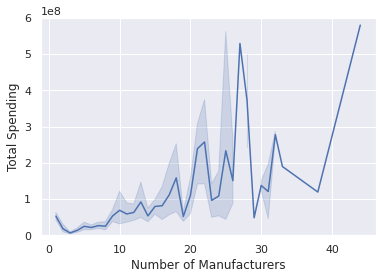

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x="Number of Manufacturers", y="Total Spending", data=df2)
ax.set(ylim = (0,600000000))

#### Looks like Total Spending varies but what about Price Per Dose?
#### Lets create a visualization that represents what happens when the patent expires on a pharmaceutical and the number of manufacturers increase from only one to a total of five manufacturers...

[(1.0, 5.0)]

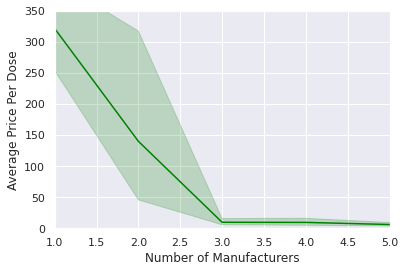

In [ ]:
ax = sns.lineplot(x="Number of Manufacturers", y="Average Price Per Dose", data=df2, palette='flare', color='green')
ax.set(ylim = (0,350))
ax.set(xlim = (1, 5))

#### Wow!! This is a great visualization which represents a unique relationship in the pharmaceutical industry...¶
#### As the Number of Manufacturers for a drug increases, the Average Price Per dose decreases!!

### Thanks for reading :)